In [ ]:
if (!require("BiocManager", quietly = TRUE)) {
  install.packages("BiocManager")
}

if (!require("ggtree", quietly = TRUE)) {
  BiocManager::install("ggtree")
}

if (!require("aplot", quietly = TRUE)) {
  install.packages("aplot")
}

In [12]:
library(ggtree)
library(ggplot2)
library(aplot)

In [2]:
or_genes <- read.csv("data/ORgenes.csv")
or_genes[
  which(or_genes$Species == "Loxodonta Africana"),
  "Species"
] <- "Loxodonta africana"


In [3]:
species_tree <- read.tree("data/phyliptree.phy")
species_tree$tip.label <- as.vector(noquote(gsub(
  "\'",
  "",
  species_tree$tip.label,
  fixed = TRUE
)))
basionym_and_synonym <- list(
  c("Nesogale talazaci", "Microgale talazaci"),
  c("Phataginus tricuspis", "Manis tricuspis"),
  c("Tupaia chinensis", "Tupaia belangeri chinensis")
)
for (i in basionym_and_synonym) {
  species_tree$tip.label[which(species_tree$tip.label == i[1])] <- i[2]
}

# NCBI couldn't find the subspecies
print(setdiff(or_genes$Species, species_tree$tip.label))


[1] "Ceratotherium cottoni"


In [4]:
order_list <- c(
  "Rodentia",
  "Artiodactyla",
  "Primates",
  "Perissodactyla",
  "Carnivora",
  "Chiroptera",
  "Eulipotyphla",
  "Pilosa"
)


In [5]:
species_order <- sapply(order_list, function(i) {
  tips <- species_tree$tip.label[tidytree::offspring(species_tree, i)]
  tips[!is.na(tips)]
})
species_order[["Other_mammals"]] <- setdiff(
  species_tree$tip.label,
  unlist(species_order)
)


In [6]:
tree_with_group <- groupOTU(
  species_tree,
  species_order,
  group_name = "species_order"
)


In [7]:
order_colors <- list(
  "red",
  "blue",
  "dark green",
  "orange",
  "purple",
  "magenta",
  "navy",
  "green",
  "dark grey"
)
names(order_colors) <- names(species_order)

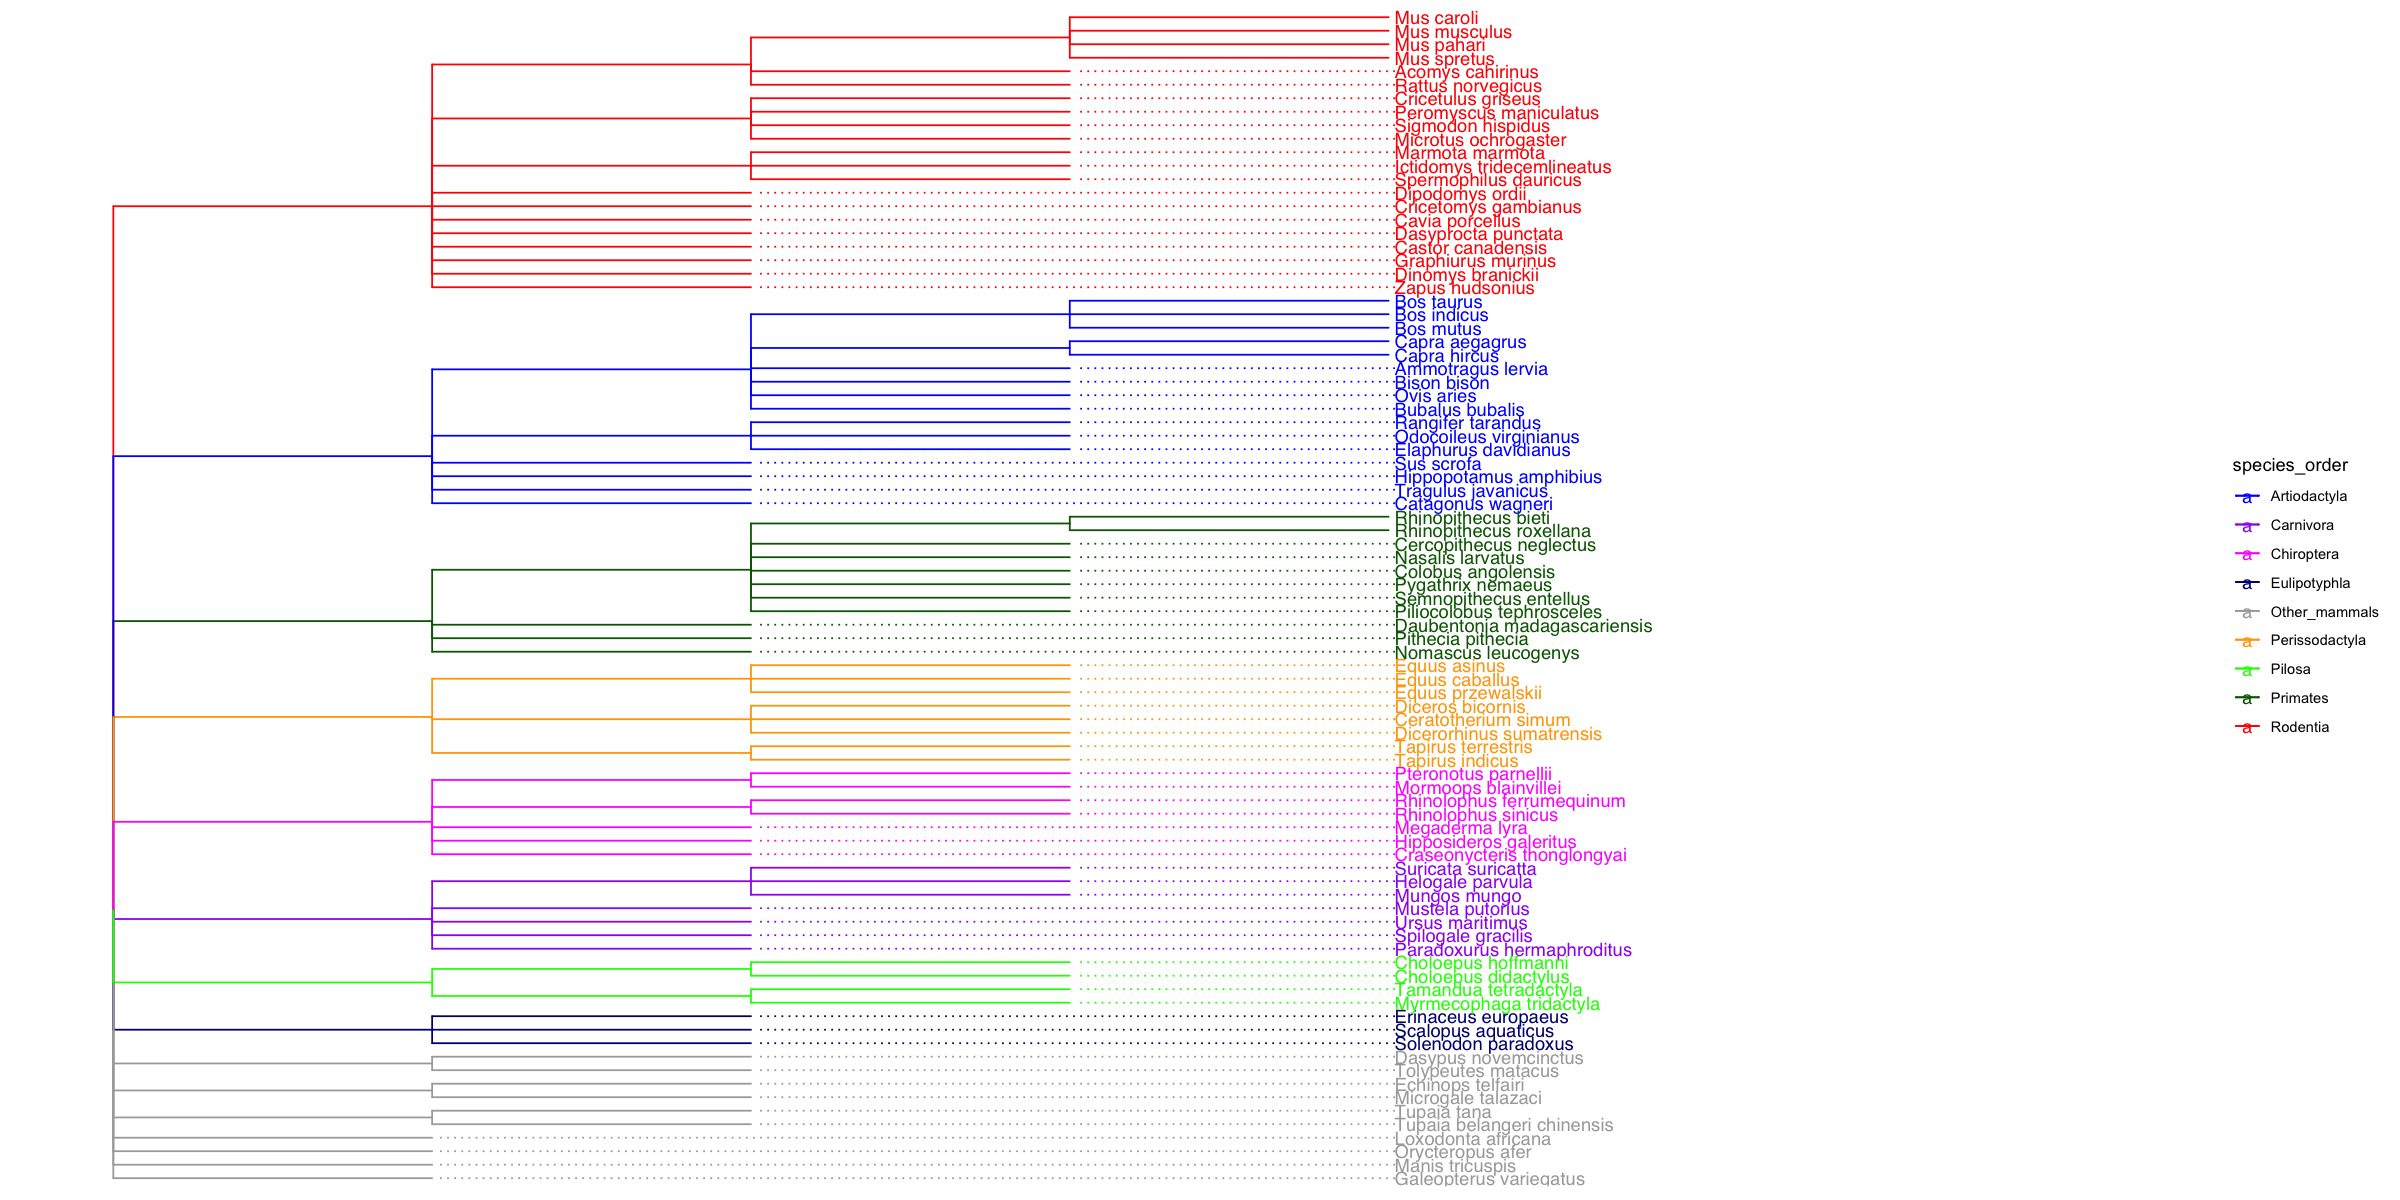

In [9]:
options(repr.plot.width = 20, repr.plot.height = 10)

g <- ggtree(tree_with_group, aes(color = species_order)) +
  geom_tiplab(align = TRUE) +
  xlim(0, 25) +
  scale_color_manual(values = order_colors)

g
options(repr.plot.width = 7, repr.plot.height = 7)


In [10]:
missing_order <- data.frame(
  "values" = "Ceratotherium cottoni",
  "ind" = "Perissodactyla"
)
order_values <- rbind(stack(species_order), missing_order)
colnames(order_values) <- c("Species", "Order")
or_genes_with_order <- merge(or_genes, order_values, by = "Species")


In [15]:
with_missing_value <- or_genes_with_order[
  which(!or_genes_with_order$Species == "Ceratotherium cottoni"),
]

g4 <- ggplot(
  with_missing_value,
  aes(Species, Functional, fill = Order)
) +
  geom_col() +
  coord_flip() +
  theme(
    axis.title.y = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.y = element_blank(),
  )


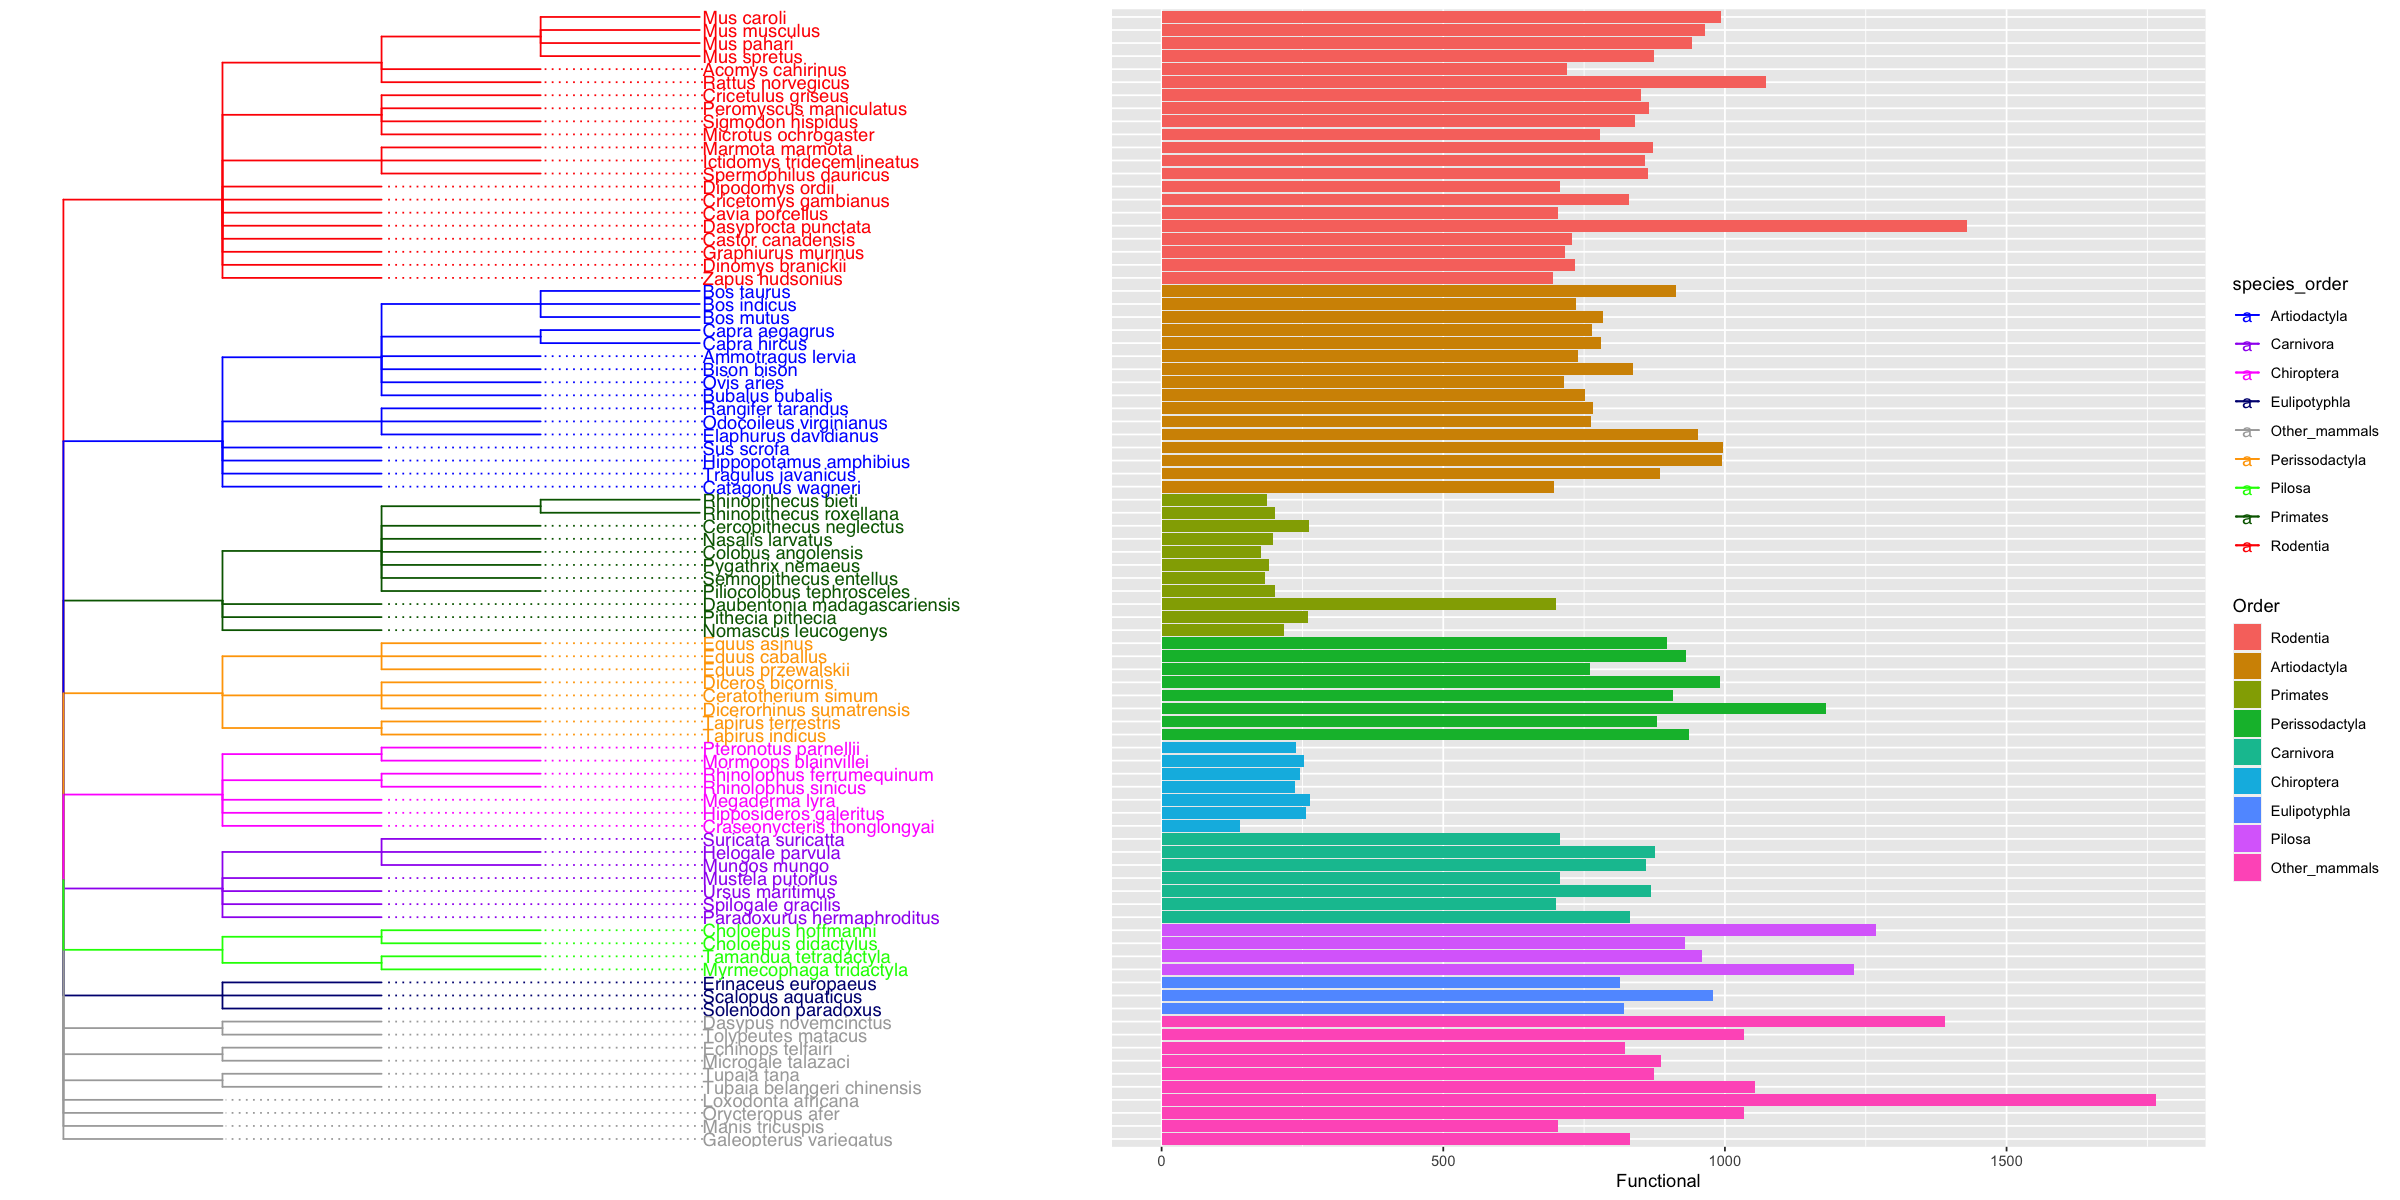

In [16]:
options(repr.plot.width = 20, repr.plot.height = 10)
insert_left(g4, g)
options(repr.plot.width = 7, repr.plot.height = 7)
